#### 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import pandas as pd

In [4]:
X = pd.read_csv('data/stud.csv')
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
y = (X['math_score'] + X['reading_score'] + X['writing_score'])/3
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [6]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns
print(num_features)
print(cat_features)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', OneHotEncoder(), cat_features),
        ('StandardScaler', StandardScaler(), num_features)
    ]
)

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [7]:
X = preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 20)

In [9]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 20), (200, 20))

In [10]:
# Create an Evaluate Function to give all metrics after model Training
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = root_mean_squared_error(true, pred)
    r2 = r2_score(true, pred)
    return mae, rmse, r2


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'SVR': SVR(),
    'K Neighbor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Adaboost': AdaBoostRegressor(),
    'Gradient Boost': GradientBoostingRegressor(),
    'Xgboost': XGBRegressor()
}
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate results
    mae_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
    mae_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

    # Print results
    model_list.append(list(models.keys())[i])
    print(f'Model: {list(models.keys())[i]}')
    print('Model performance for training set')
    print(f'- MAE: {mae_train}')
    print(f'- RMSE: {rmse_train}')
    print(f'- R2: {r2_train}')
    print('-'*35)
    print('Model performance for test set')
    print(f'- MAE: {mae_test}')
    print(f'- RMSE: {rmse_test}')
    print(f'- R2: {r2_test}')
    print('='*35)
    print('\n')
    r2_list.append(r2_test)


Model: Linear Regression
Model performance for training set
- MAE: 1.6266987756807795e-14
- RMSE: 2.100950334747028e-14
- R2: 1.0
-----------------------------------
Model performance for test set
- MAE: 1.589839371263224e-14
- RMSE: 2.1684653752922612e-14
- R2: 1.0


Model: Ridge
Model performance for training set
- MAE: 0.006499357373329855
- RMSE: 0.008023851967422982
- R2: 0.9999996772003924
-----------------------------------
Model performance for test set
- MAE: 0.006696634238846233
- RMSE: 0.008812154315044587
- R2: 0.99999963775105


Model: Lasso
Model performance for training set
- MAE: 0.8506012933972129
- RMSE: 1.0644964050678285
- R2: 0.9943185972010731
-----------------------------------
Model performance for test set
- MAE: 0.8768807904727826
- RMSE: 1.1141619571094954
- R2: 0.9942091862272519


Model: Elastic Net
Model performance for training set
- MAE: 2.140694140202109
- RMSE: 2.67648783836715
- R2: 0.9640831921424444
-----------------------------------
Model performa

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by='R2 Score')

,Model Name,R2 Score
4,SVR,0.863902
5,K Neighbor,0.956016
3,Elastic Net,0.963417
8,Adaboost,0.977444
6,Decision Tree,0.988343
2,Lasso,0.994209
7,Random Forest,0.994289
10,Xgboost,0.994748
9,Gradient Boost,0.995707
1,Ridge,1.000000


### Linear Regression

In [13]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

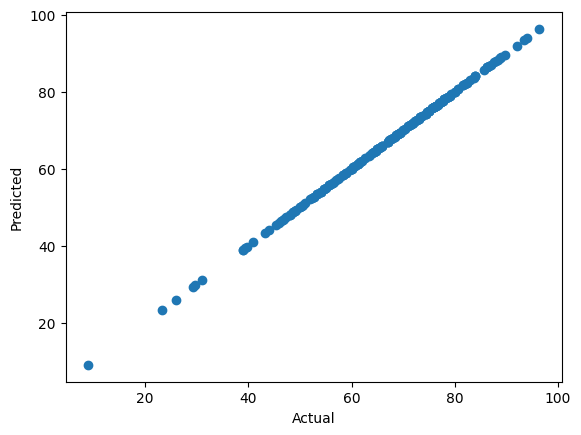

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')